In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
df=pd.read_csv('Articles.csv',encoding='latin')

In [3]:
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [4]:
df.isnull().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.drop(['Date','Heading'],axis=1,inplace=True)

In [7]:
df.head()

,Article,NewsType
0,KARACHI: The Sindh government has decided to b...,business
1,HONG KONG: Asian markets started 2015 on an up...,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,business
4,NEW YORK: US oil prices Monday slipped below $...,business


In [8]:
df['NewsType'].unique()

array(['business', 'sports'], dtype=object)

<Axes: xlabel='count', ylabel='NewsType'>

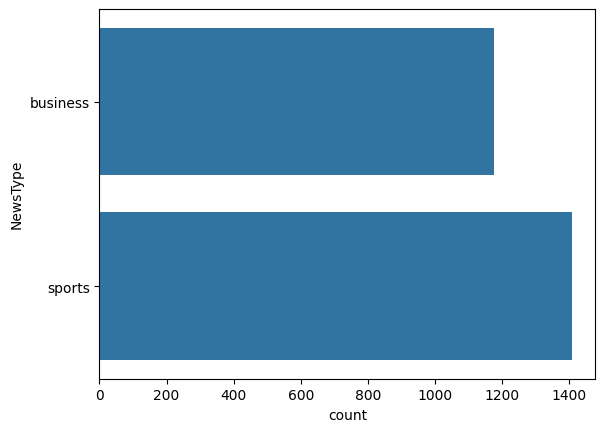

In [9]:
sns.countplot(df['NewsType'])

In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [11]:
df['NewsType']=lb.fit_transform(df['NewsType'])

In [12]:
df.head()

,Article,NewsType
0,KARACHI: The Sindh government has decided to b...,0
1,HONG KONG: Asian markets started 2015 on an up...,0
2,HONG KONG: Hong Kong shares opened 0.66 perce...,0
3,HONG KONG: Asian markets tumbled Tuesday follo...,0
4,NEW YORK: US oil prices Monday slipped below $...,0


In [13]:
df['NewsType'].unique()

array([0, 1])

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [15]:
lemma=WordNetLemmatizer()
stop=set(stopwords.words('english'))

def preprocess(text):
    text=text.lower()

    #remove special character and digits
    text=re.sub(r'[^a-zA-z]', ' ', text)

    #tokenize
    words=text.split()

    #remove stop words
    words=[word for word in words if word not in stop]

    #lemmatize 
    words=[lemma.lemmatize(word) for word in words]

    #join the words back 
    text=' '.join(words)

    return text


In [16]:
df['Article']=df['Article'].apply(preprocess)

In [17]:
df.head()

,Article,NewsType
0,karachi sindh government decided bring public ...,0
1,hong kong asian market started upswing limited...,0
2,hong kong hong kong share opened percent lower...,0
3,hong kong asian market tumbled tuesday followi...,0
4,new york u oil price monday slipped barrel fir...,0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vector=TfidfVectorizer()

In [20]:
X=vector.fit_transform(df['Article'])

In [21]:
X=X.toarray()

In [22]:
X.shape

(2585, 22953)

In [23]:
y=df['NewsType']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=52)

In [26]:
X_train.shape

(1809, 22953)

In [27]:
X_test.shape

(776, 22953)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(n_jobs=5)

In [29]:
lr.fit(X_train,y_train)

LogisticRegression(n_jobs=5)

In [30]:
lr.score(X_train,y_train)

0.9994472084024323

In [44]:
vector.transform(['hai today we got sport where argentia win']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [51]:
import tkinter as tk

def submit_text():
    # Get the text from the input box
    input_text = text_input.get("1.0", tk.END).strip()

    input_text = preprocess(input_text)
    input_text=vector.transform([input_text]).toarray()
    if lr.predict(input_text) == 1:
        input_text='sports'
    else:
        input_text='business'
    # Display the input text in the result box
    result_box.config(state=tk.NORMAL)  # Enable editing to insert text
    result_box.delete("1.0", tk.END)  # Clear previous results
    result_box.insert(tk.END, input_text)  # Insert new text
    result_box.config(state=tk.DISABLED)  # Disable editing again

# Create the main window
root = tk.Tk()
root.title("Text Box Example")

# Create a large text box
text_input = tk.Text(root, height=10, width=50)
text_input.pack(pady=10)

# Create a submit button
submit_button = tk.Button(root, text="Submit", command=submit_text)
submit_button.pack(pady=5)

# Create a smaller result box (read-only)
result_box = tk.Text(root, height=2, width=20, state=tk.DISABLED)  # Adjusted height
result_box.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()